# 제4 고지 : 신경망 만들기 
## STEP 48 : 다중 클래스 분류

이번 단계에서는 spiral dataset 을 활용해 `multi-class classification` 를 실제로 해본다.


### 48.1 스파이럴 데이터셋

`dezero/datasets.py` 에 정의된 `get_spiral()` 을 이용해 실습할 데이터셋을 불러온다. 해당 데이터셋은 3개의 클래스 분류이며 300개의 2차원 데이터를 입력으로 한다.
```python
import dezero

x,t = dezero.datasets.get_spiral(train=True)
print(x.shape)
print(t.shape)

print(x[10],t[10])
print(x[110],t[110])
```

<p align='center'>
    <img src='../assets/그림 48-1.png' align='center' width='50%'>
</p>



In [1]:
import sys
sys.path.append("..")

import dezero

x,t = dezero.datasets.get_spiral(train=True)
print(x.shape)
print(t.shape)

print(x[10],t[10])
print(x[110],t[110])

(300, 2)
(300,)
[-0.12995958 -0.00324155] 1
[ 0.3282343  -0.54941994] 0


### 48.2 학습 코드

이제 실제로 학습을 진행해보고, 결과 값이 `decision boundary` 를 잘 형성하는지 확인해본다.

epoch 1, loss 1.13
epoch 21, loss 0.73
epoch 41, loss 0.71
epoch 61, loss 0.64
epoch 81, loss 0.52
epoch 101, loss 0.42
epoch 121, loss 0.36
epoch 141, loss 0.27
epoch 161, loss 0.23
epoch 181, loss 0.20
epoch 201, loss 0.17
epoch 221, loss 0.16
epoch 241, loss 0.15
epoch 261, loss 0.15
epoch 281, loss 0.13


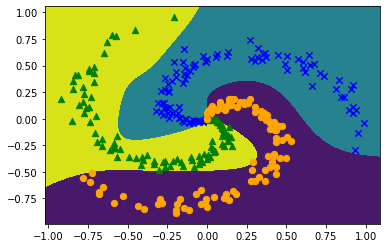

In [4]:
import os, sys
sys.path.append("..")

import math
import numpy as np
import matplotlib.pyplot as plt
import dezero
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP


log_interval = 20 # 20 epoch 마다 logging

# 1. 하이퍼 파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0


# 2. 데이터 읽기 / 모델, 옵티마이저 생성
x, t = dezero.datasets.get_spiral(train=True)
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

data_size = len(x)
max_iter = math.ceil(data_size / batch_size)

for epoch in range(max_epoch):
    # 3. 데이터셋 셔플
    index = np.random.permutation(data_size)
    sum_loss = 0

    for i in range(max_iter):
        # 4. 미니 배치 생성
        batch_index = index[i * batch_size:(i + 1) * batch_size]
        batch_x = x[batch_index]
        batch_t = t[batch_index]

        # 5. 기울기 산출 / 매개변수 갱신
        y = model(batch_x)
        loss = F.softmax_cross_entropy(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(batch_t)

    # 6. 에폭마다 학습 경과 출력
    avg_loss = sum_loss / data_size
    if epoch % log_interval == 0:
        print('epoch %d, loss %.2f' % (epoch + 1, avg_loss))

# Plot boundary area the model predict
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]

with dezero.no_grad():
    score = model(X)
predict_cls = np.argmax(score.data, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)

# Plot data points of the dataset
N, CLS_NUM = 100, 3
markers = ['o', 'x', '^']
colors = ['orange', 'blue', 'green']
for i in range(len(x)):
    c = t[i]
    plt.scatter(x[i][0], x[i][1], s=40,  marker=markers[c], c=colors[c])
plt.show()